In [88]:
!pip3 install -U ucimlrepo 

In [89]:
# from ucimlrepo import fetch_ucirepo 
  
# # fetch dataset 
# forest_fires = fetch_ucirepo(id=162) 
  
# # data (as pandas dataframes) 
# X = forest_fires.data.features 
# Y = forest_fires.data.targets 
  
# # metadata 
# print(forest_fires.metadata) 
  
# # variable information 
# print(forest_fires.variables)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch dataset
forest_fires = pd.read_csv("Datasets/forest_fires/forestfires.csv")

# Data (as pandas DataFrames)
X = forest_fires.drop(columns=['area'])  # Features (drop the target column)
Y = forest_fires['area']  # Target (the 'area' column)

# Create a DataFrame for the features (X)
df_X = pd.DataFrame(X)

# Convert target (Y) to a DataFrame and give it a column name, for example 'Y'
df_Y = pd.DataFrame(Y, columns=['area'])

# Combine features and target into one DataFrame
df = pd.concat([df_X, df_Y], axis=1)

# Show the first few rows of the combined DataFrame
print(df.head())


   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [90]:
# Print dataset information to inspect the structure and attributes
print(forest_fires.info())  # General information about the dataset (including data types and non-null counts)

# Print the column names (this replaces forest_fires.variables)
print(forest_fires.columns)

# Print the first few rows to visually inspect the data
print(forest_fires.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None
Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1

In [91]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [92]:
# Convert 'month' and 'day' to categorical data type
df['month'] = df['month'].astype('category')
df['day'] = df['day'].astype('category')
# Data types
print("Data types:")
print(df.dtypes)

Data types:
X           int64
Y           int64
month    category
day      category
FFMC      float64
DMC       float64
DC        float64
ISI       float64
temp      float64
RH          int64
wind      float64
rain      float64
area      float64
dtype: object


In [93]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [94]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [95]:
# Assuming df is your DataFrame containing the forest fire dataset

# Get the data types of all features
feature_dtypes = df.dtypes

# Print the data types
print(feature_dtypes)

# If you want to convert it to a DataFrame for a nicer display
dtype_df = feature_dtypes.reset_index()
dtype_df.columns = ['Feature', 'Data Type']

# Print the DataFrame with features and their data types
print(dtype_df)


X           int64
Y           int64
month    category
day      category
FFMC      float64
DMC       float64
DC        float64
ISI       float64
temp      float64
RH          int64
wind      float64
rain      float64
area      float64
dtype: object
   Feature Data Type
0        X     int64
1        Y     int64
2    month  category
3      day  category
4     FFMC   float64
5      DMC   float64
6       DC   float64
7      ISI   float64
8     temp   float64
9       RH     int64
10    wind   float64
11    rain   float64
12    area   float64


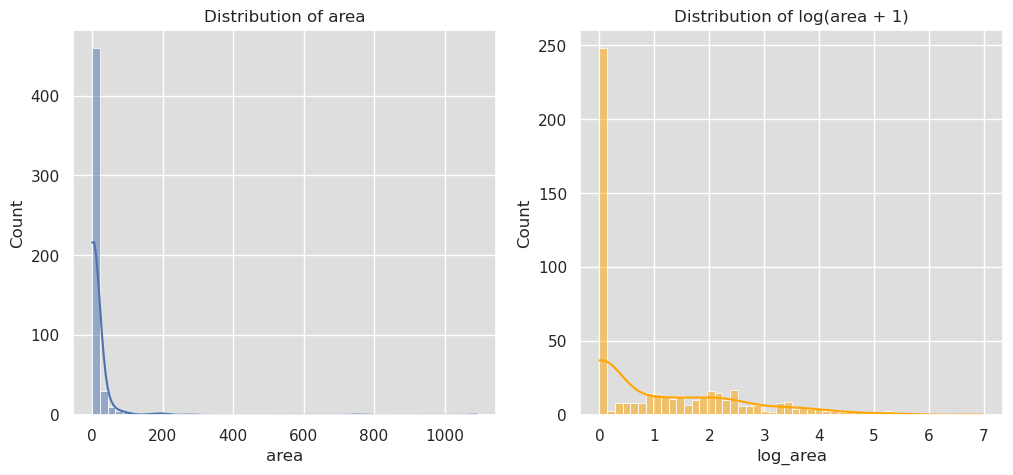

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,log_area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,1,0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,1,0,0,0,0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,0,0,0,0,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0.0


In [96]:
# Optionally, you may want to drop or encode categorical variables
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['month', 'day'], drop_first=True)

# Handle skewness in 'area' using log transformation
# Since 'area' can be zero, we add 1 to avoid log(0)
df_encoded['log_area'] = np.log(df_encoded['area'] + 1)
# Visualize the distribution of 'area' and 'log_area'
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['area'], bins=50, kde=True)
plt.title('Distribution of area')

plt.subplot(1,2,2)
sns.histplot(df_encoded['log_area'], bins=50, kde=True, color='orange')
plt.title('Distribution of log(area + 1)')

plt.show()
df_encoded.head()

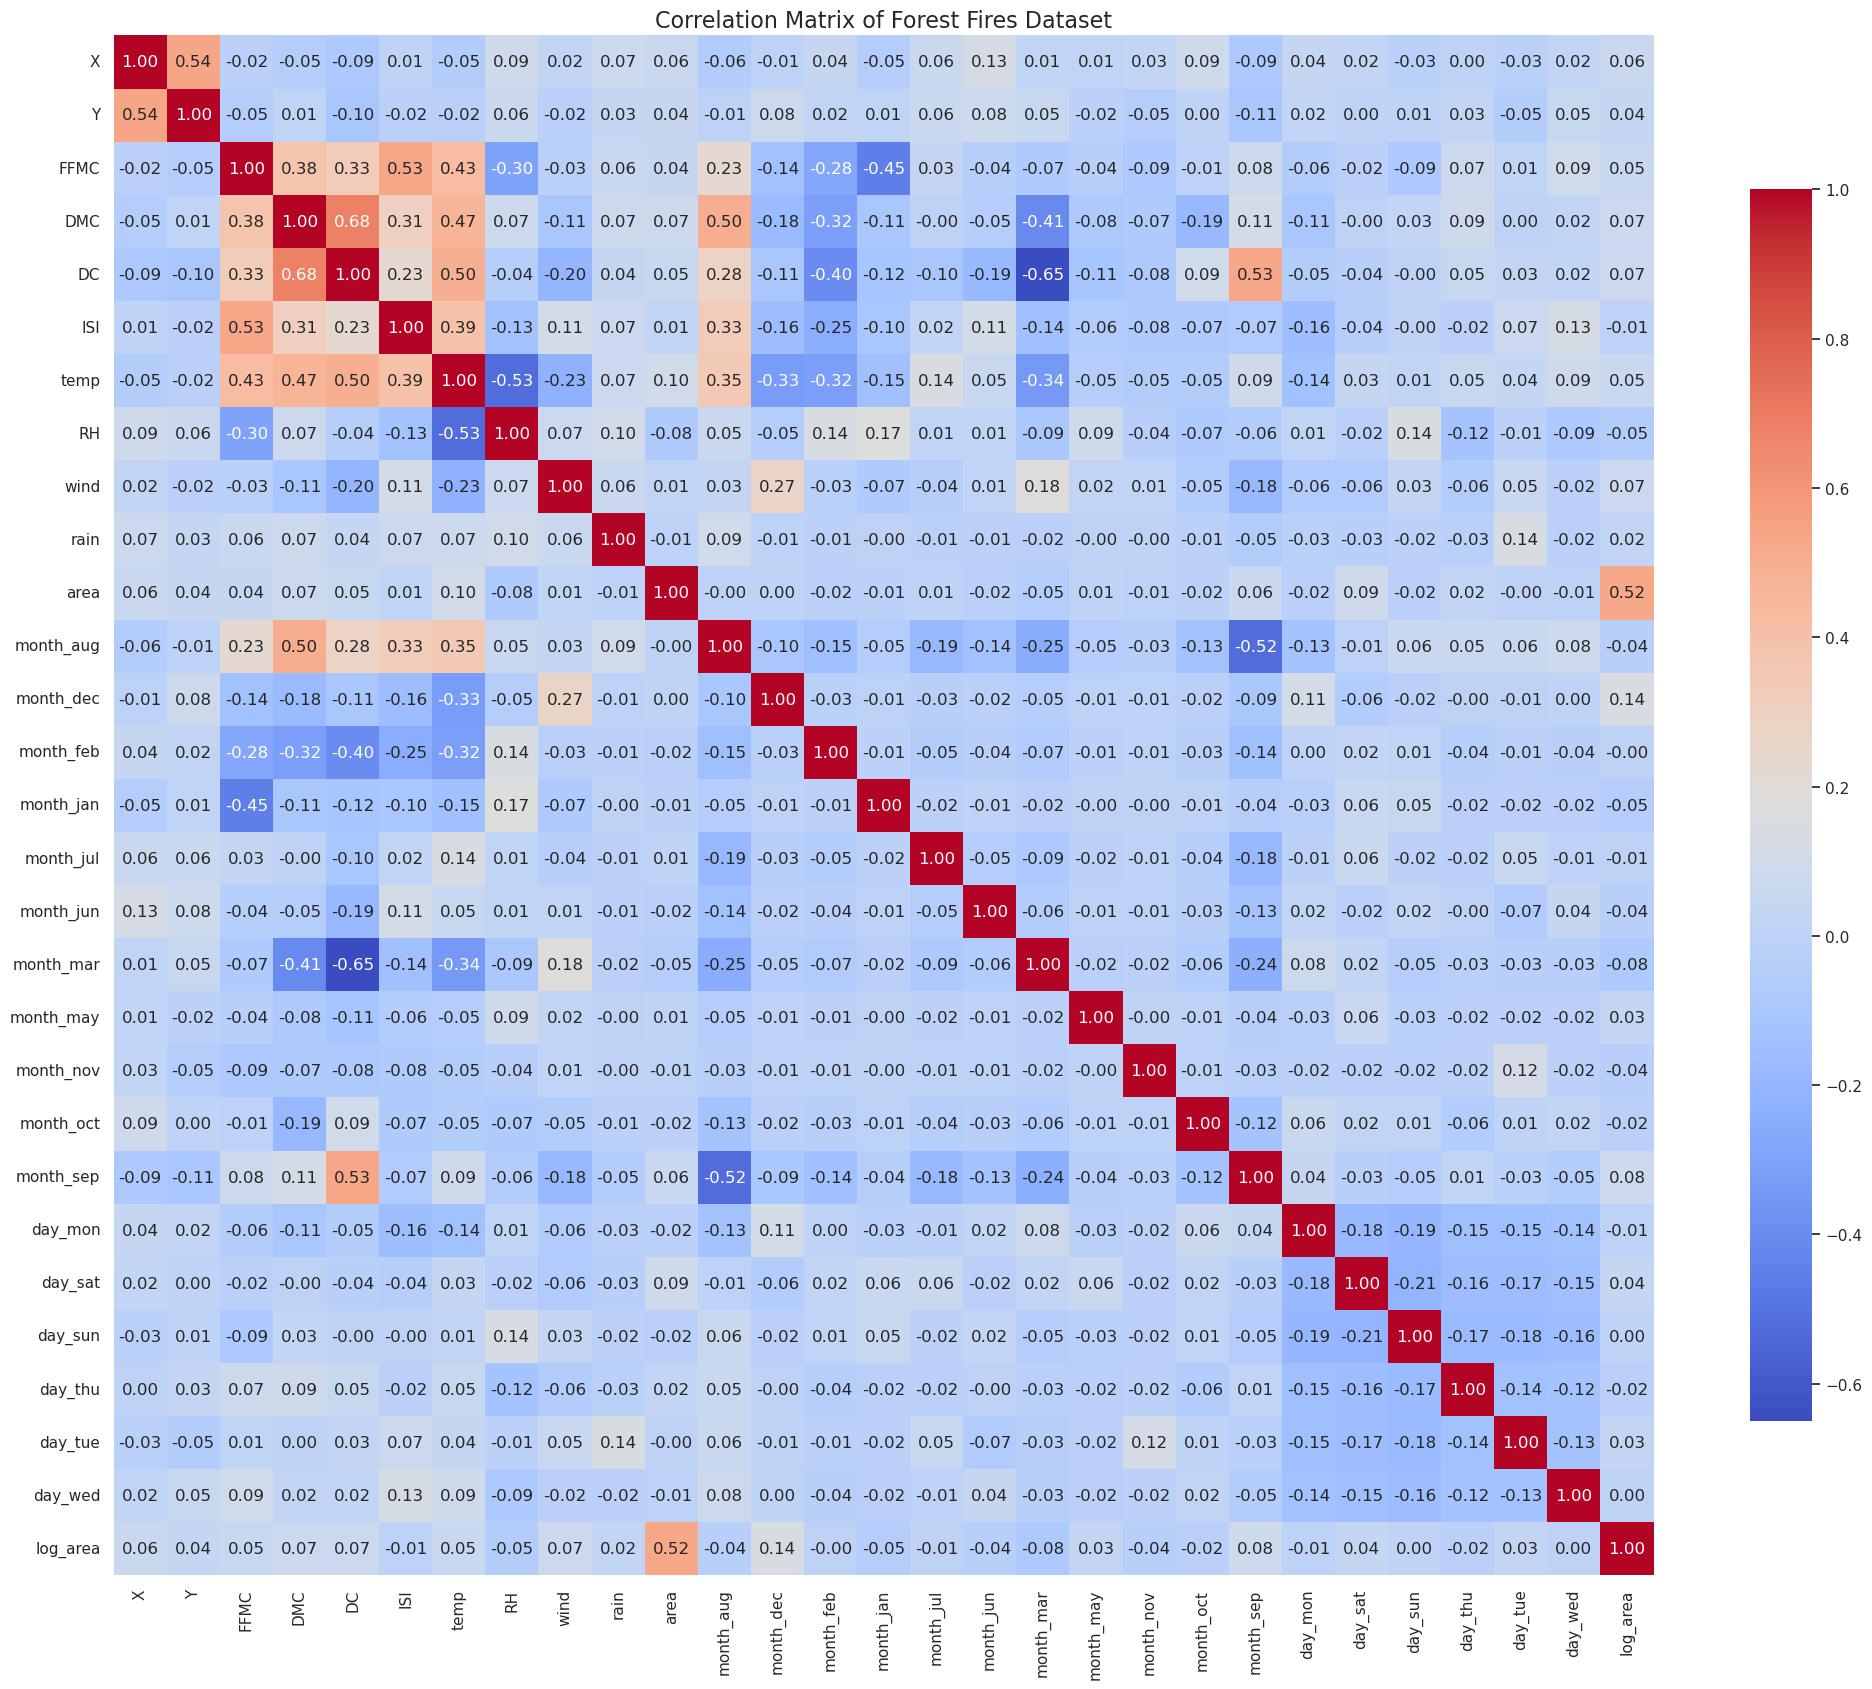

In [97]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(25, 20))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set the title
plt.title('Correlation Matrix of Forest Fires Dataset', fontsize=16)

# Show the plot
plt.show()


Correlation of features with log_area:
log_area     1.000000
area         0.524134
month_dec    0.139159
month_sep    0.082638
DMC          0.067153
wind         0.066973
DC           0.066360
X            0.061995
temp         0.053487
FFMC         0.046799
Y            0.038838
day_sat      0.036372
month_may    0.032423
day_tue      0.032202
rain         0.023311
day_sun      0.004438
day_wed      0.000645
month_feb   -0.003330
month_jul   -0.005035
day_mon     -0.006160
ISI         -0.010347
day_thu     -0.022189
month_oct   -0.024000
month_nov   -0.035009
month_aug   -0.035026
month_jun   -0.035363
month_jan   -0.049558
RH          -0.053662
month_mar   -0.082736
Name: log_area, dtype: float64


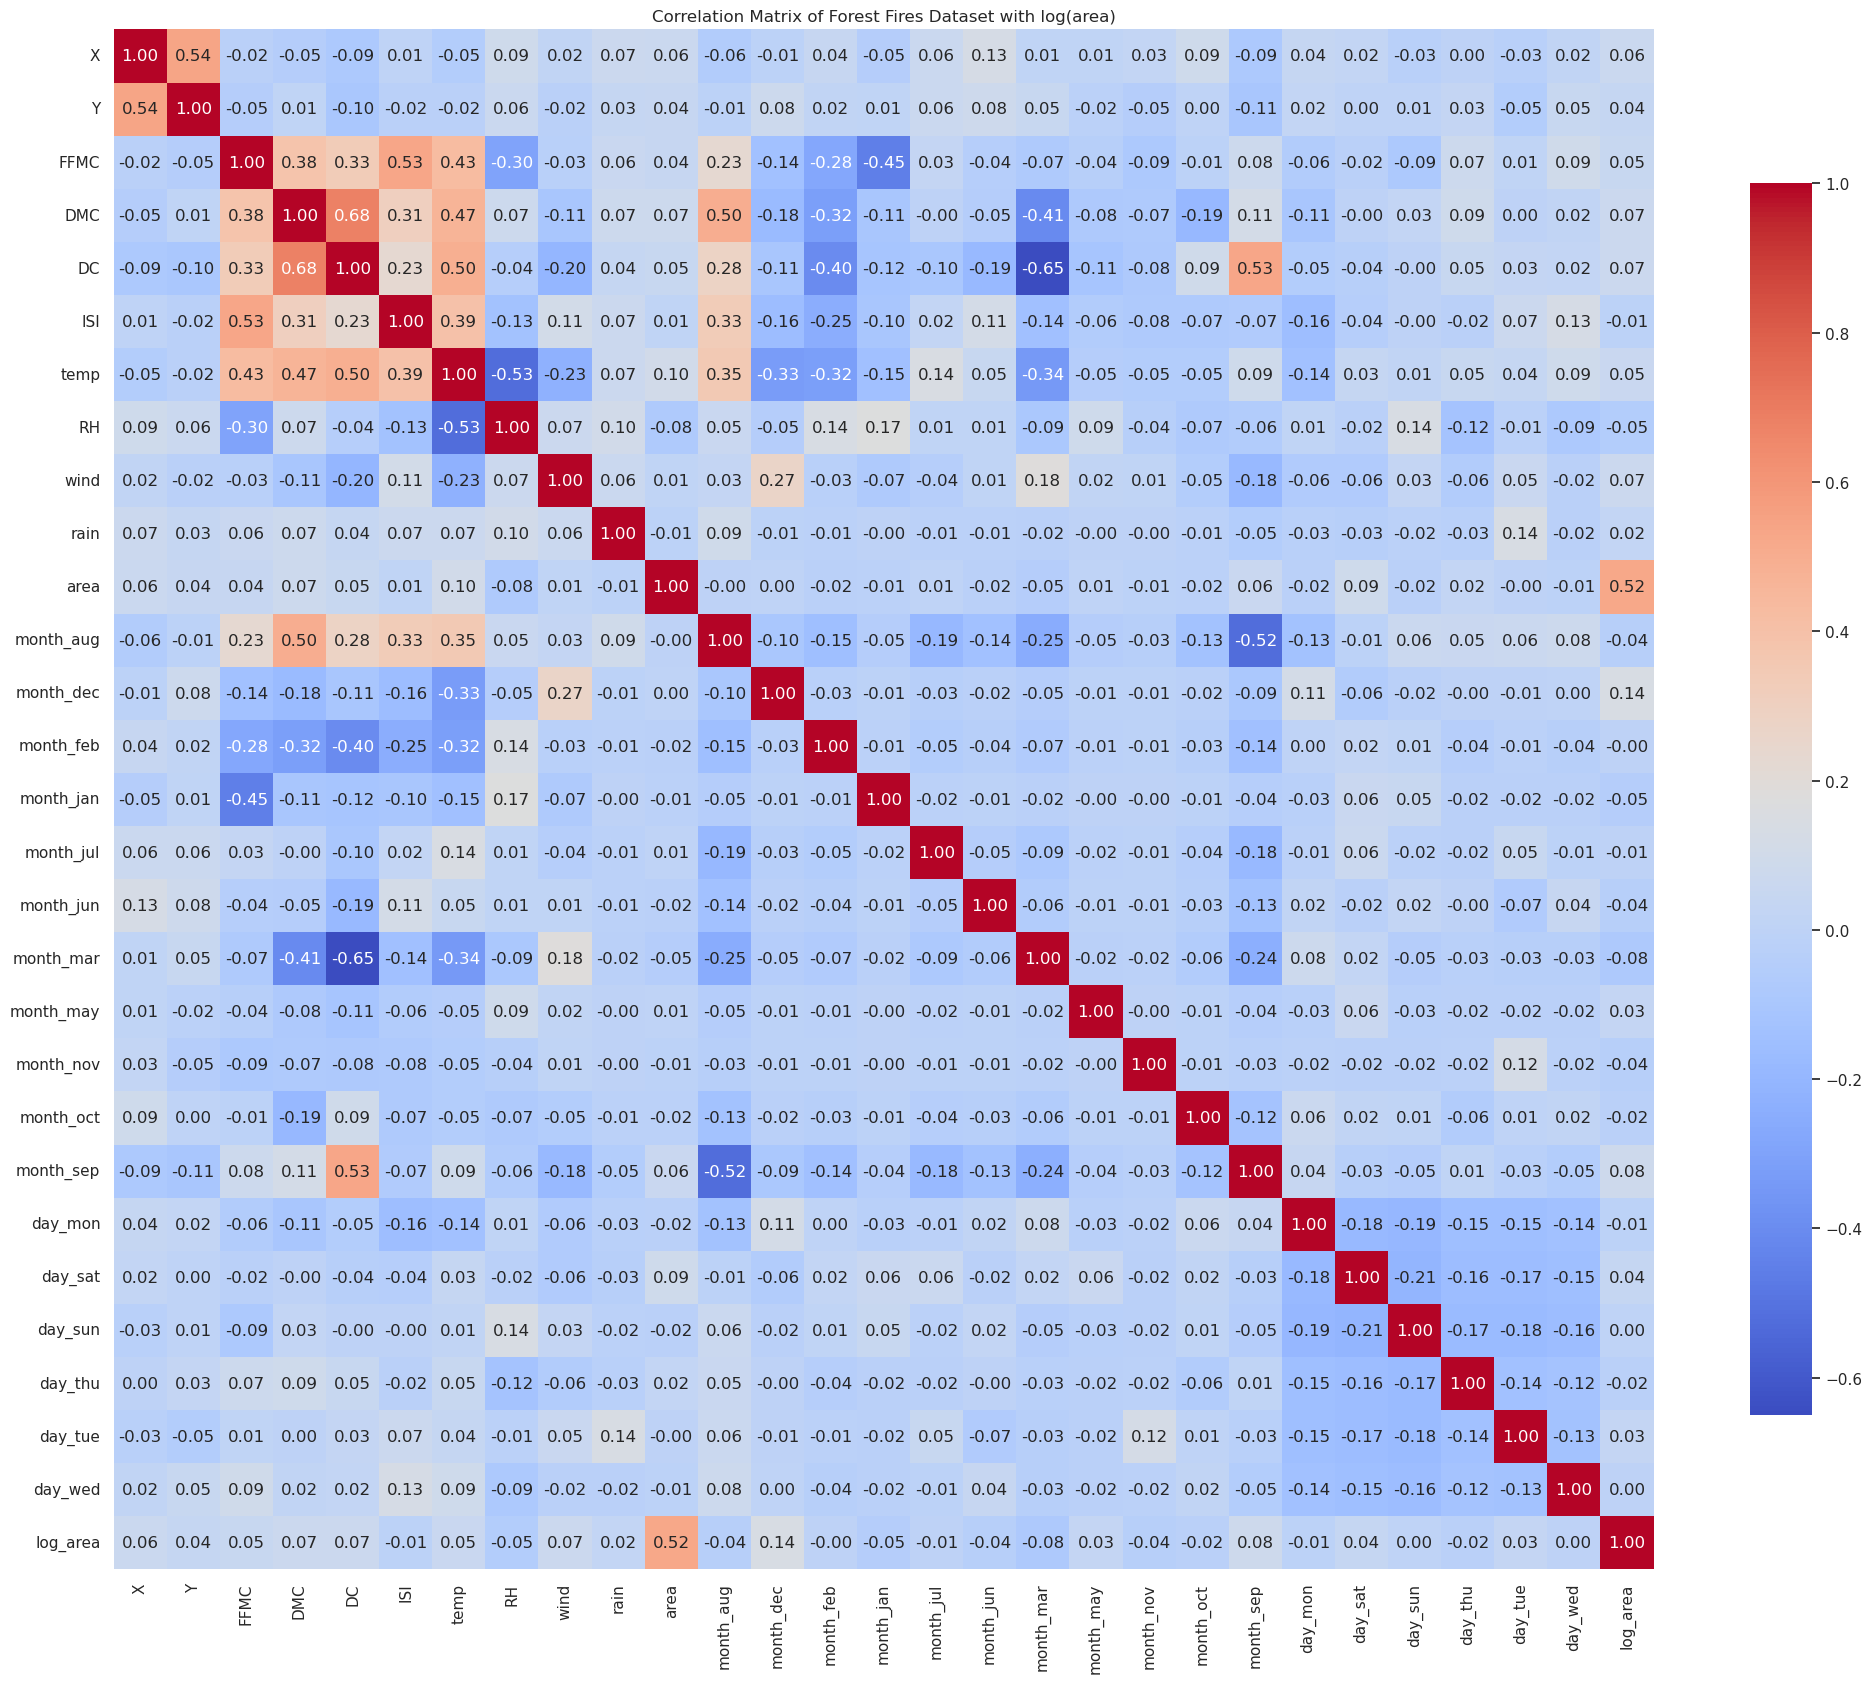

In [98]:
# Update the correlation matrix with 'log_area'
correlation_matrix = df_encoded.corr()

# Correlation of features with 'log_area'
corr_with_log_area = correlation_matrix['log_area'].sort_values(ascending=False)
print("Correlation of features with log_area:")
print(corr_with_log_area)


# Visualization of the updated correlation matrix with annotations
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Forest Fires Dataset with log(area)')
plt.show()



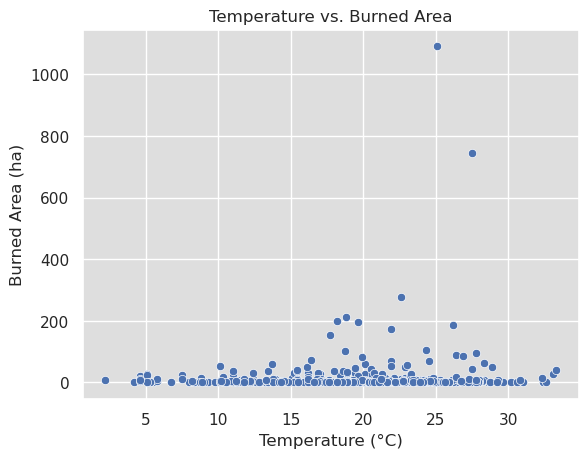

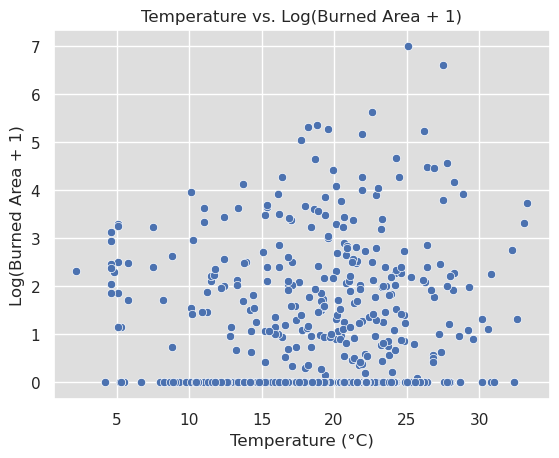

In [99]:
sns.scatterplot(data=df, x='temp', y='area')
plt.title('Temperature vs. Burned Area')
plt.xlabel('Temperature (°C)')
plt.ylabel('Burned Area (ha)')
plt.show()
sns.scatterplot(data=df_encoded, x='temp', y='log_area')
plt.title('Temperature vs. Log(Burned Area + 1)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Log(Burned Area + 1)')
plt.show()


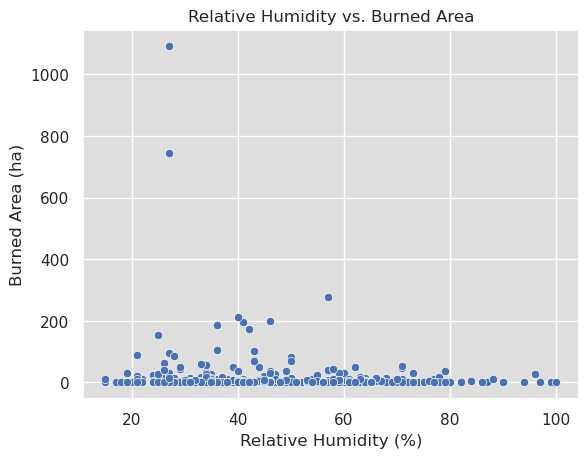

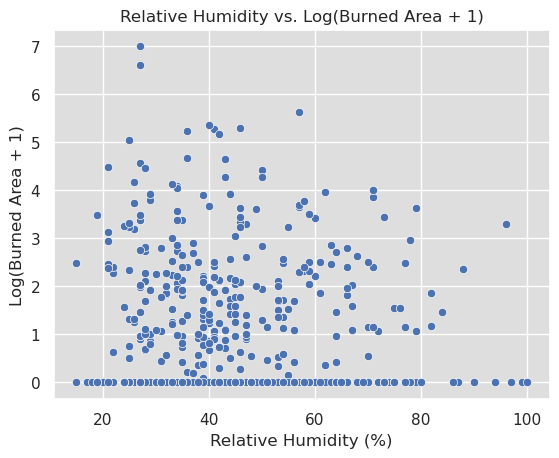

In [100]:
sns.scatterplot(data=df, x='RH', y='area')
plt.title('Relative Humidity vs. Burned Area')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Burned Area (ha)')
plt.show()

sns.scatterplot(data=df_encoded, x='RH', y='log_area')
plt.title('Relative Humidity vs. Log(Burned Area + 1)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Log(Burned Area + 1)')
plt.show()


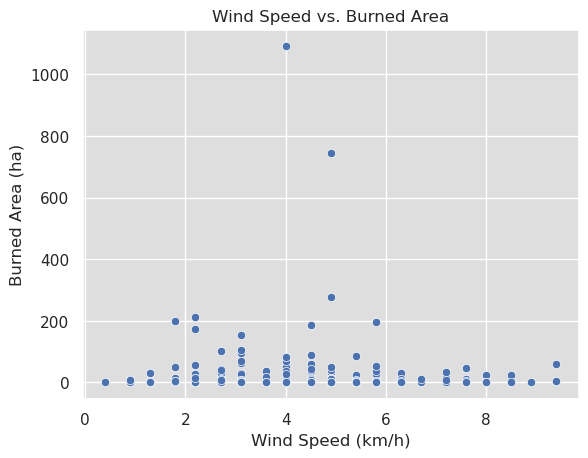

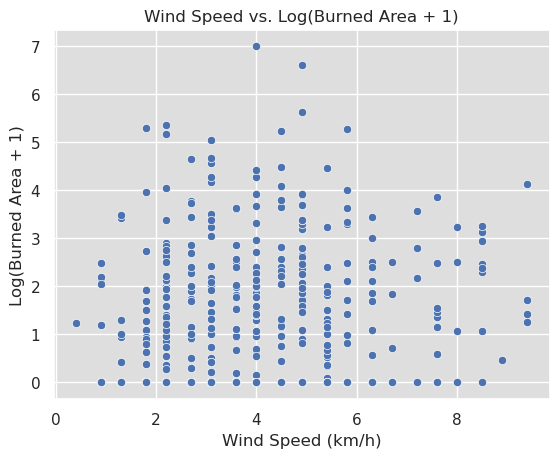

In [101]:
sns.scatterplot(data=df, x='wind', y='area')
plt.title('Wind Speed vs. Burned Area')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Burned Area (ha)')
plt.show()
sns.scatterplot(data=df_encoded, x='wind', y='log_area')
plt.title('Wind Speed vs. Log(Burned Area + 1)')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Log(Burned Area + 1)')
plt.show()


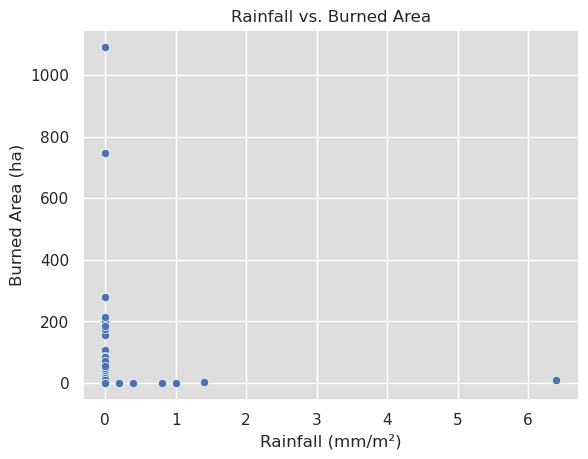

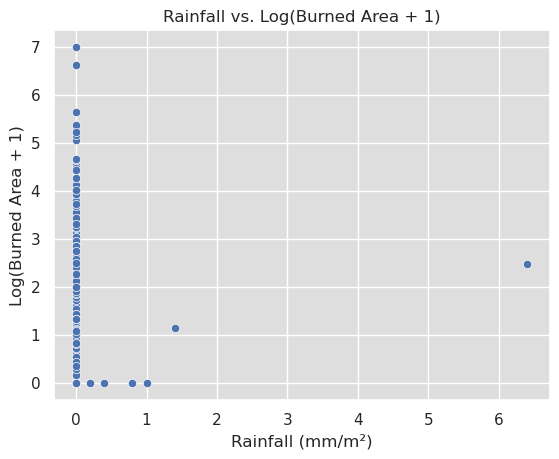

In [102]:
sns.scatterplot(data=df, x='rain', y='area')
plt.title('Rainfall vs. Burned Area')
plt.xlabel('Rainfall (mm/m²)')
plt.ylabel('Burned Area (ha)')
plt.show()
sns.scatterplot(data=df_encoded, x='rain', y='log_area')
plt.title('Rainfall vs. Log(Burned Area + 1)')
plt.xlabel('Rainfall (mm/m²)')
plt.ylabel('Log(Burned Area + 1)')
plt.show()



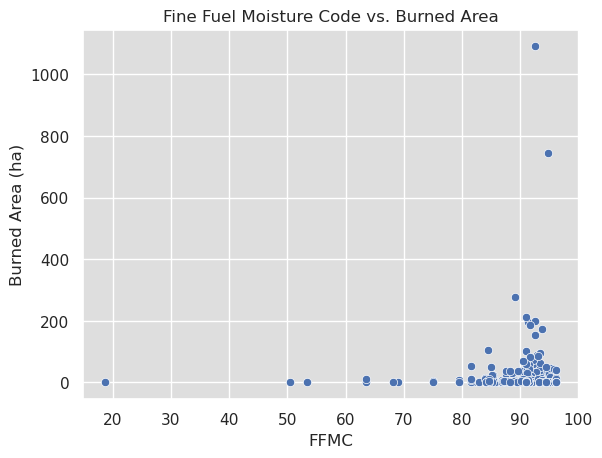

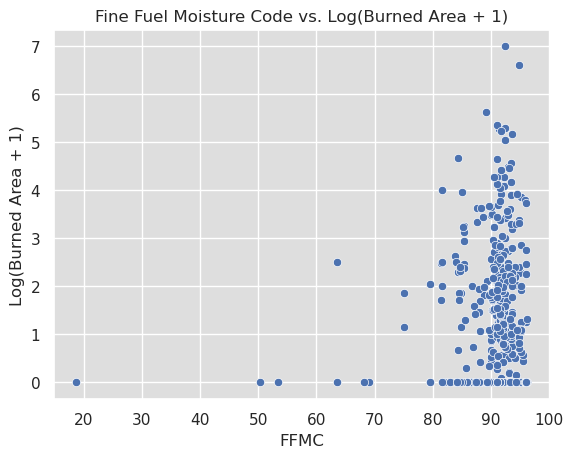

In [103]:
sns.scatterplot(data=df, x='FFMC', y='area')
plt.title('Fine Fuel Moisture Code vs. Burned Area')
plt.xlabel('FFMC')
plt.ylabel('Burned Area (ha)')
plt.show()
sns.scatterplot(data=df_encoded, x='FFMC', y='log_area')
plt.title('Fine Fuel Moisture Code vs. Log(Burned Area + 1)')
plt.xlabel('FFMC')
plt.ylabel('Log(Burned Area + 1)')
plt.show()

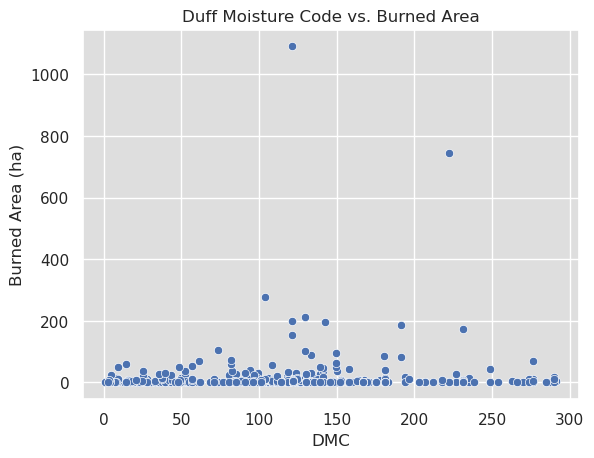

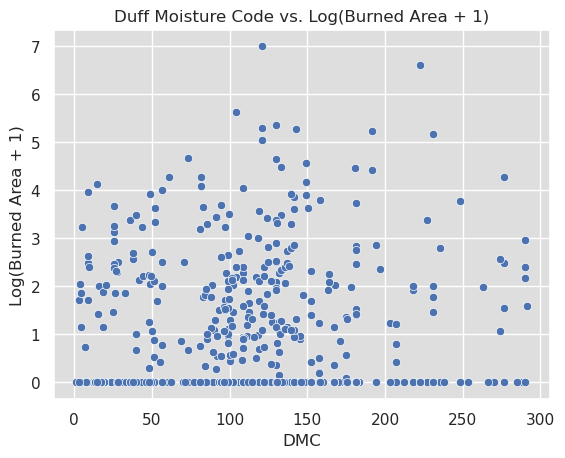

In [104]:
sns.scatterplot(data=df, x='DMC', y='area')
plt.title('Duff Moisture Code vs. Burned Area')
plt.xlabel('DMC')
plt.ylabel('Burned Area (ha)')
plt.show()
sns.scatterplot(data=df_encoded, x='DMC', y='log_area')
plt.title('Duff Moisture Code vs. Log(Burned Area + 1)')
plt.xlabel('DMC')
plt.ylabel('Log(Burned Area + 1)')
plt.show()


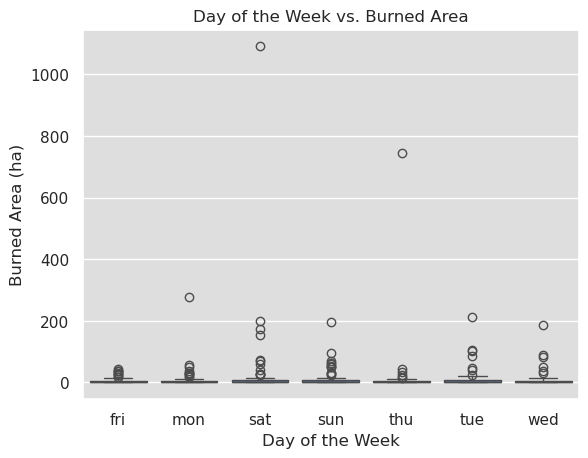

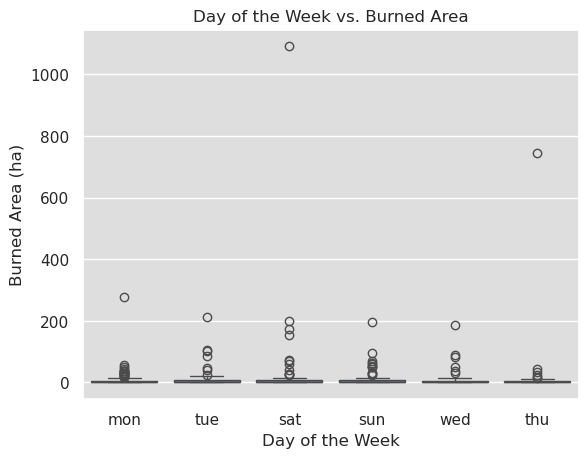

In [105]:
sns.boxplot(data=df, x='day', y='area')
plt.title('Day of the Week vs. Burned Area')
plt.xlabel('Day of the Week')
plt.ylabel('Burned Area (ha)')
plt.show()
day_columns = [col for col in df_encoded.columns if col.startswith('day_')]
df_encoded['day'] = df_encoded[day_columns].idxmax(axis=1).str.replace('day_', '')

# Boxplot for Day of the Week vs Burned Area
sns.boxplot(data=df_encoded, x='day', y='area')
plt.title('Day of the Week vs. Burned Area')
plt.xlabel('Day of the Week')
plt.ylabel('Burned Area (ha)')
plt.show()

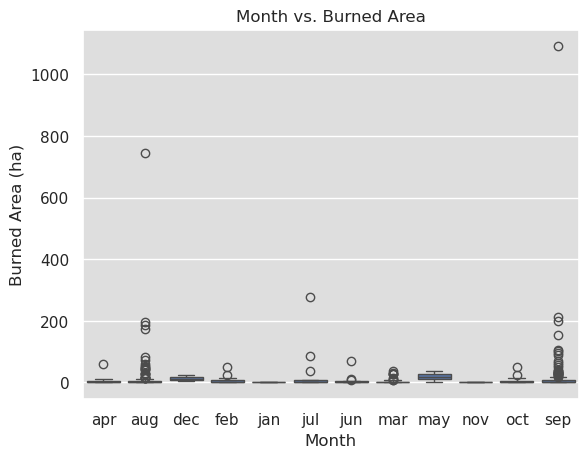

In [106]:
sns.boxplot(data=df, x='month', y='area')
plt.title('Month vs. Burned Area')
plt.xlabel('Month')
plt.ylabel('Burned Area (ha)')
plt.show()


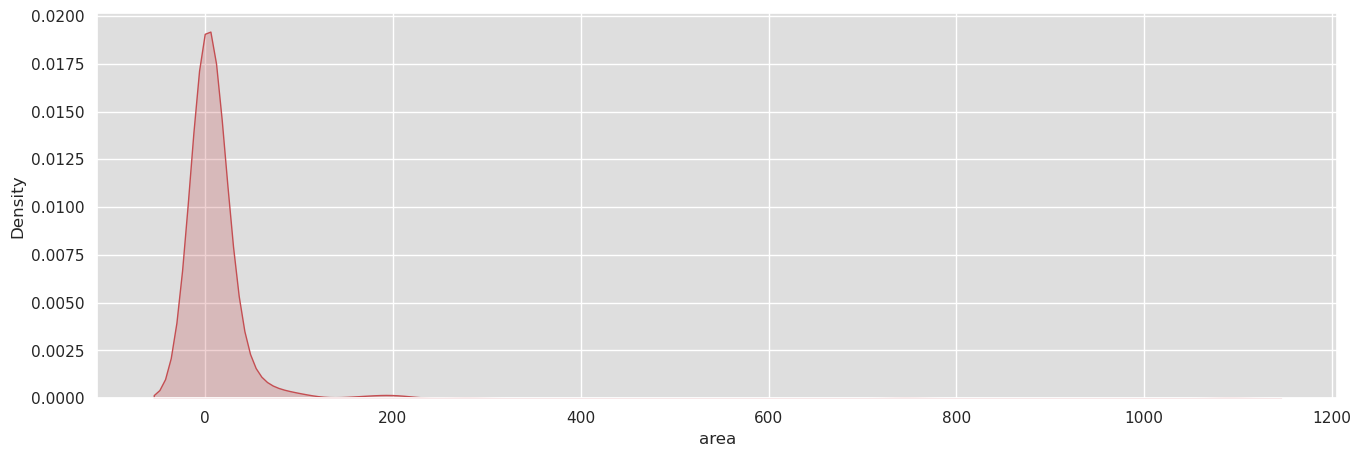

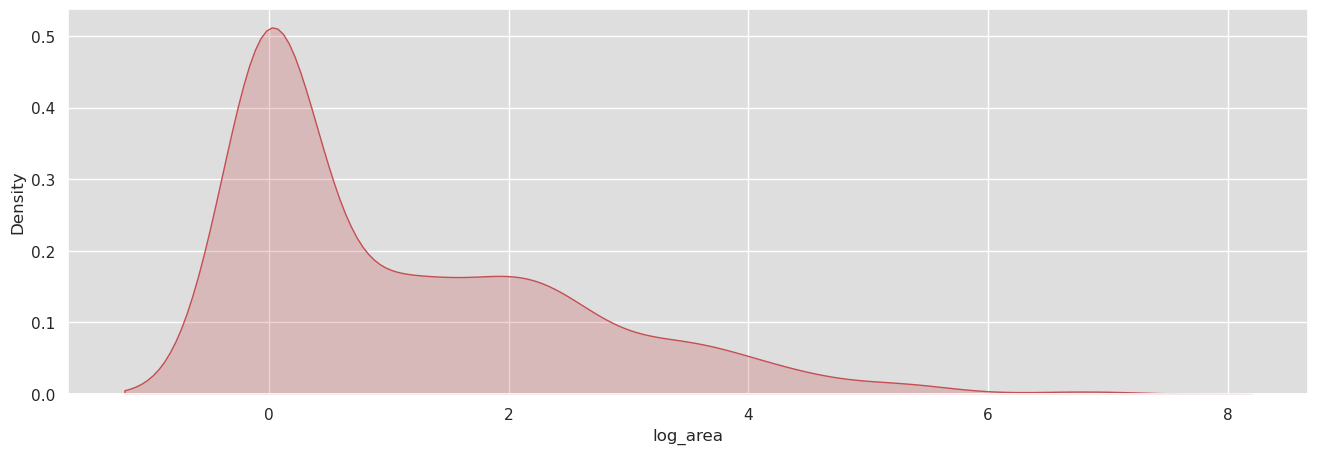

In [107]:
plt.figure(figsize=(16,5))
ax = sns.kdeplot(df['area'],fill=True,color='r')
plt.show()
plt.figure(figsize=(16,5))
ax = sns.kdeplot(df_encoded['log_area'],fill=True,color='r')
plt.show()



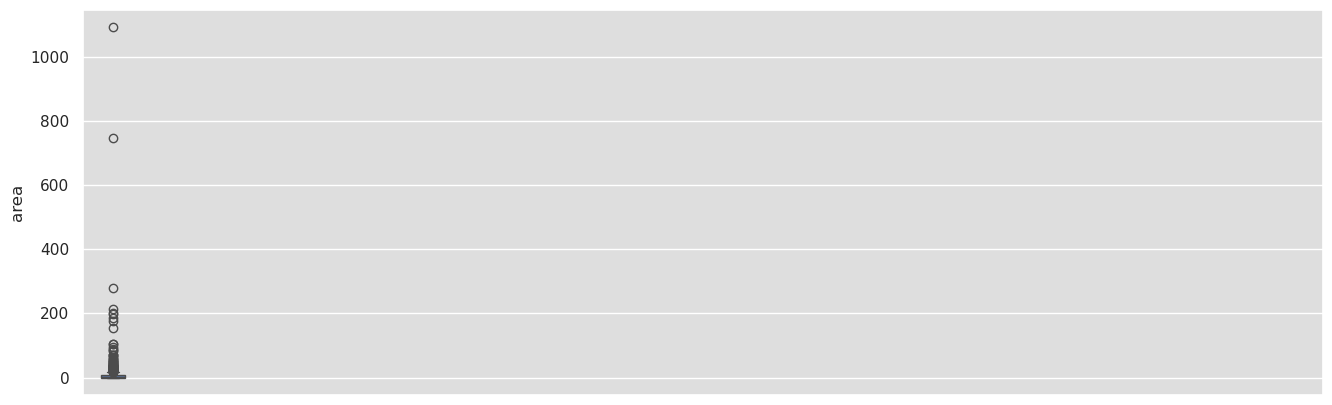

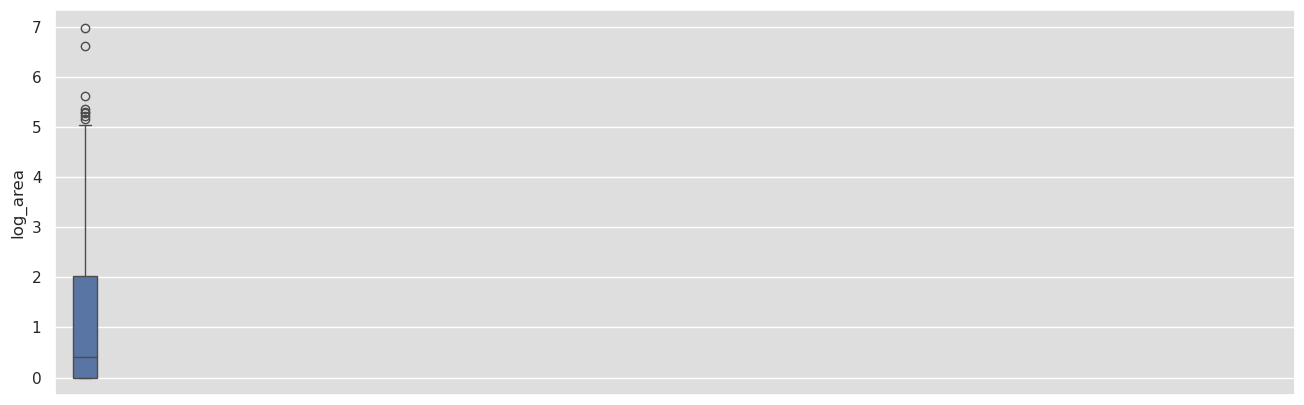

In [108]:
plt.figure(figsize=(16,5))
ax = sns.boxplot(df['area'])
ax.set_xlim(-1, 40)
plt.show()
plt.figure(figsize=(16,5))
ax = sns.boxplot(df_encoded['log_area'])
ax.set_xlim(-1, 40)
plt.show()

In [109]:
print("Skew: {}".format(df['area'].skew()))
print("Kurtosis: {}".format(df['area'].kurtosis()))
print("Skew: {}".format(df_encoded['log_area'].skew()))
print("Kurtosis: {}".format(df_encoded['log_area'].kurtosis()))
# Skewness tells us that the majority of the data are on the left and the outliers are on the right.
# Kurtosis tells us that the data tend to move away from the average.

Skew: 12.846933533934868
Kurtosis: 194.1407210942299
Skew: 1.2178376559535011
Kurtosis: 0.9456680757207487


In [110]:
# ************* Handling Outliers *************
from scipy.stats import zscore

# Calculate z-scores of log_area
z_scores = zscore(df_encoded['log_area'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df_encoded = df_encoded[filtered_entries]
df_encoded

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,log_area,day
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,0,0,0,0.000000,mon
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,1,0,0,0,0,0,1,0,0.000000,tue
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,1,0,0,1,0,0,0,0,0.000000,sat
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,0,0,0,0.000000,mon
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0.000000,sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,1,0,0,0,2.006871,sun
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,1,0,0,0,4.012592,sun
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,1,0,0,0,2.498152,sun
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,1,0,0,0,0,0.000000,sat


In [111]:
dfa = df_encoded.drop(columns='log_area')
cat_columns = dfa.select_dtypes(include='object').columns.tolist()
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

cat_columns,num_columns

(['day'],
 ['X',
  'Y',
  'FFMC',
  'DMC',
  'DC',
  'ISI',
  'temp',
  'RH',
  'wind',
  'rain',
  'area',
  'month_aug',
  'month_dec',
  'month_feb',
  'month_jan',
  'month_jul',
  'month_jun',
  'month_mar',
  'month_may',
  'month_nov',
  'month_oct',
  'month_sep',
  'day_mon',
  'day_sat',
  'day_sun',
  'day_thu',
  'day_tue',
  'day_wed'])

In [112]:
# ************* Feature Scaling *************
from sklearn.preprocessing import StandardScaler

# List of numerical features
numerical_features = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])


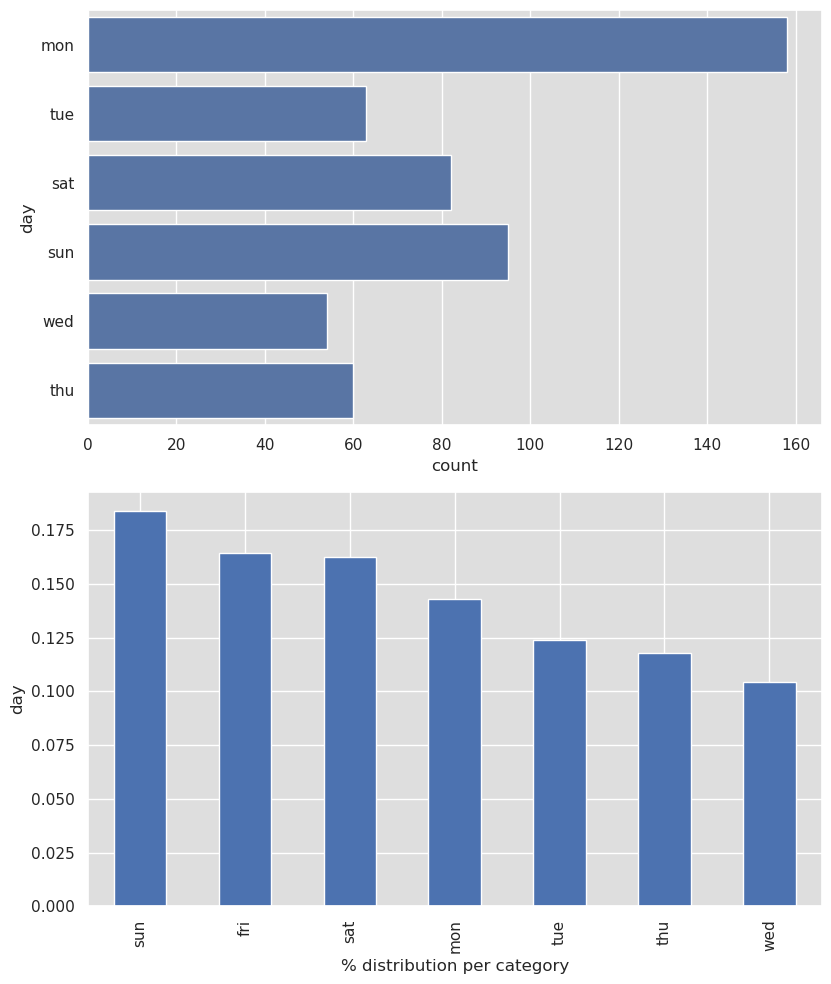

In [113]:
plt.figure(figsize=(16,10))
for i,col in enumerate(cat_columns,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df_encoded,y=col)
    plt.subplot(2,2,i+2)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  
##The following graphs show that the forest fires occur during August and September the hottest months of the year in Portugal.
#Friday, Saturday & Sunday stand out more in terms of days of the week

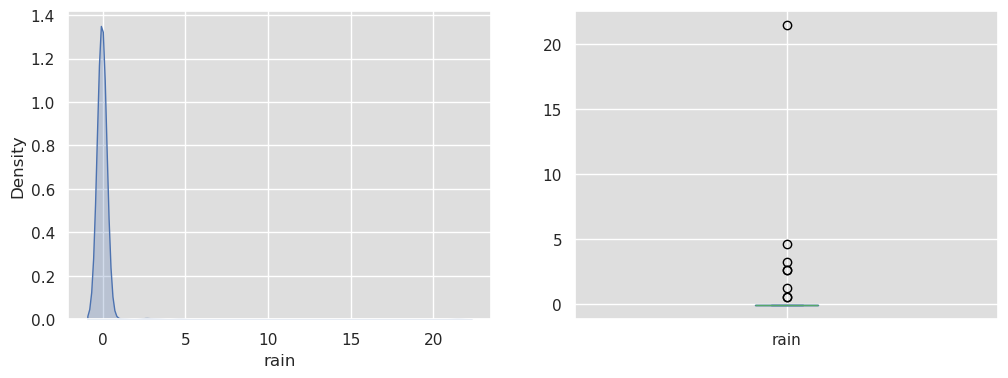

In [114]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(df_encoded['rain'],color='b',fill=True)
plt.subplot(1,2,2)
df_encoded['rain'].plot.box()
plt.show()

##Fire days occur when rain does not(in most cases)

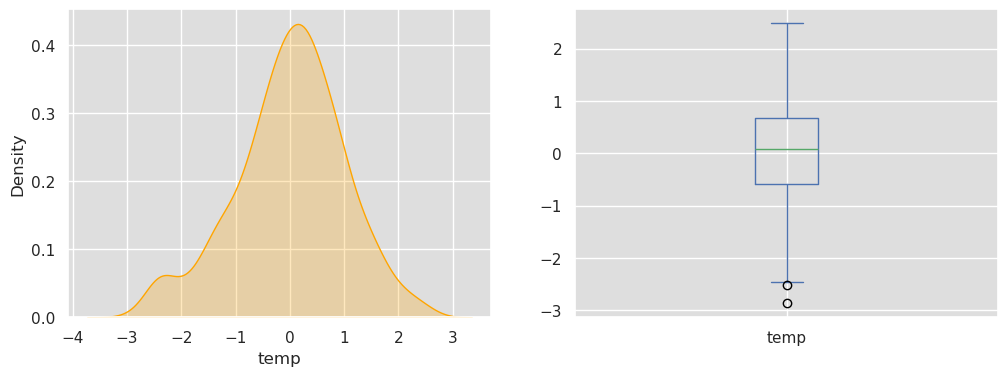

In [115]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(df_encoded['temp'],color='orange',fill=True)
plt.subplot(1,2,2)
df_encoded['temp'].plot.box()
plt.show()

##The temprature of Portugal does not seem to play an effect on the forest fires that occur

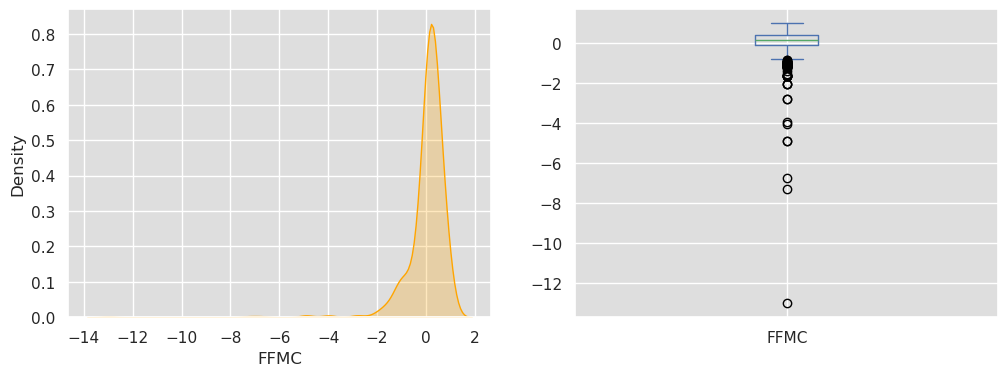

In [116]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(df_encoded['FFMC'],color='orange',fill=True)
plt.subplot(1,2,2)
df_encoded['FFMC'].plot.box()
plt.show()

##Self explanatory: Greater percentage of FFMC( dry fine fuels like grass, twigs etc.) indicate greater ignition rate

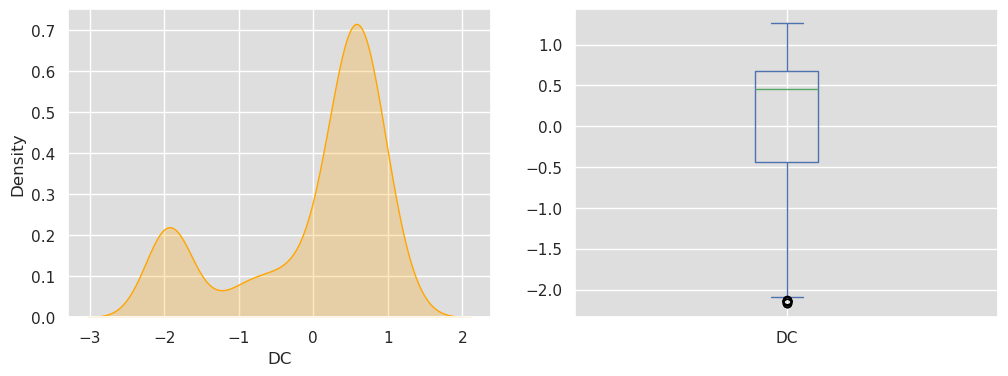

In [117]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(df_encoded['DC'],color='orange',fill=True)
plt.subplot(1,2,2)
df_encoded['DC'].plot.box()
plt.show()

## -200-200 is an outlier probably
## This range indicates that in most cases, the ground is very dry, as DC values above 500 usually signal that deep organic matter is extremely dry.
## These dry conditions can lead to more intense and sustained fires, as drier organic layers fuel longer-lasting fires.

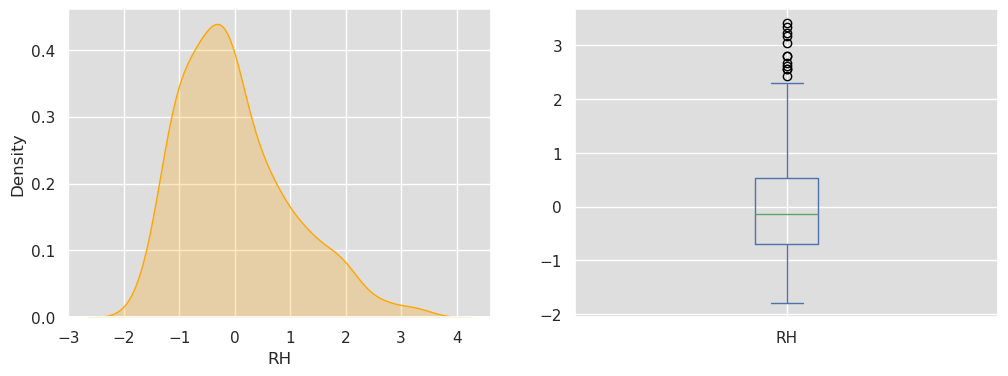

In [118]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(df_encoded['RH'],color='orange',fill=True)
plt.subplot(1,2,2)
df_encoded['RH'].plot.box()
plt.show()

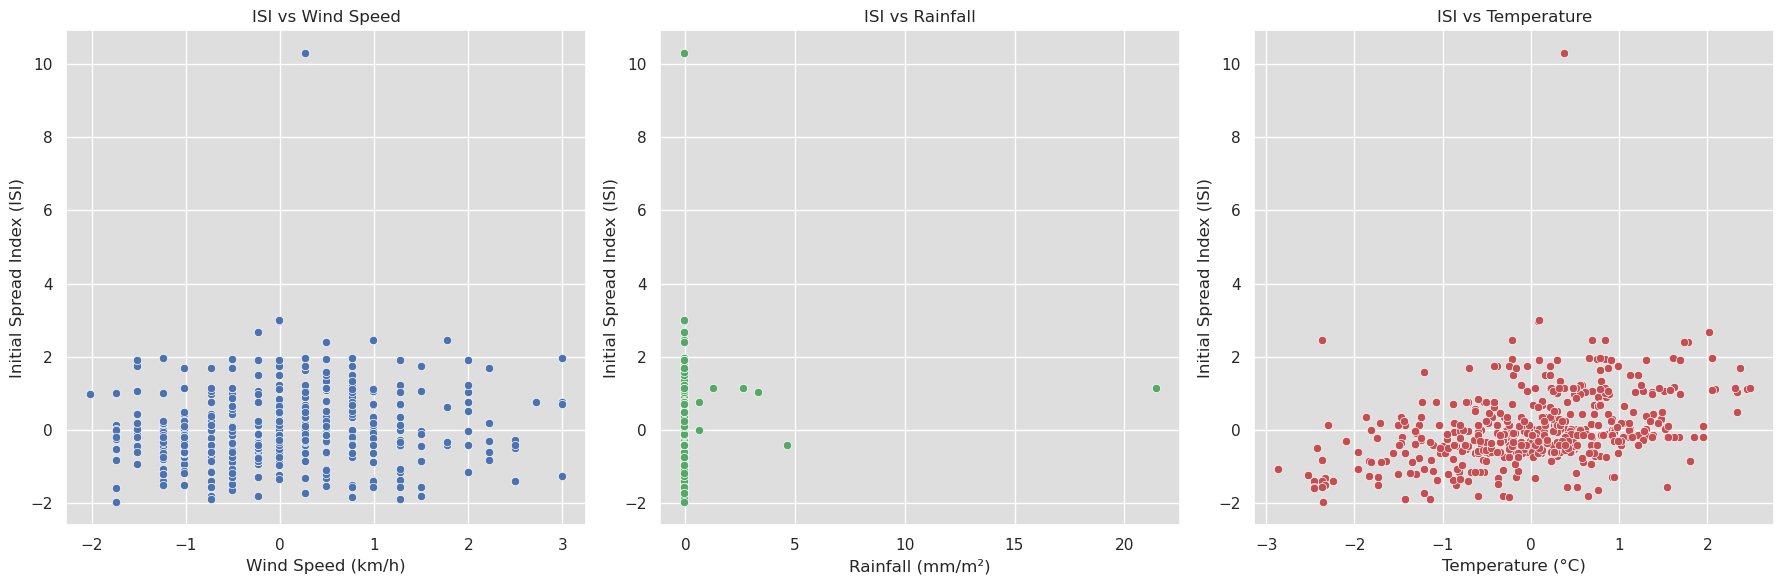

In [119]:
# Set up the figure for multiple subplots
plt.figure(figsize=(18, 6))

# ISI vs Wind
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_encoded, x='wind', y='ISI', color='b')
plt.title('ISI vs Wind Speed')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Initial Spread Index (ISI)')

# ISI vs Rain
plt.subplot(1, 3, 2)
sns.scatterplot(data=df_encoded, x='rain', y='ISI', color='g')
plt.title('ISI vs Rainfall')
plt.xlabel('Rainfall (mm/m²)')
plt.ylabel('Initial Spread Index (ISI)')

# ISI vs Temperature
plt.subplot(1, 3, 3)
sns.scatterplot(data=df_encoded, x='temp', y='ISI', color='r')
plt.title('ISI vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Initial Spread Index (ISI)')

# Display the plot
plt.tight_layout()
plt.show()

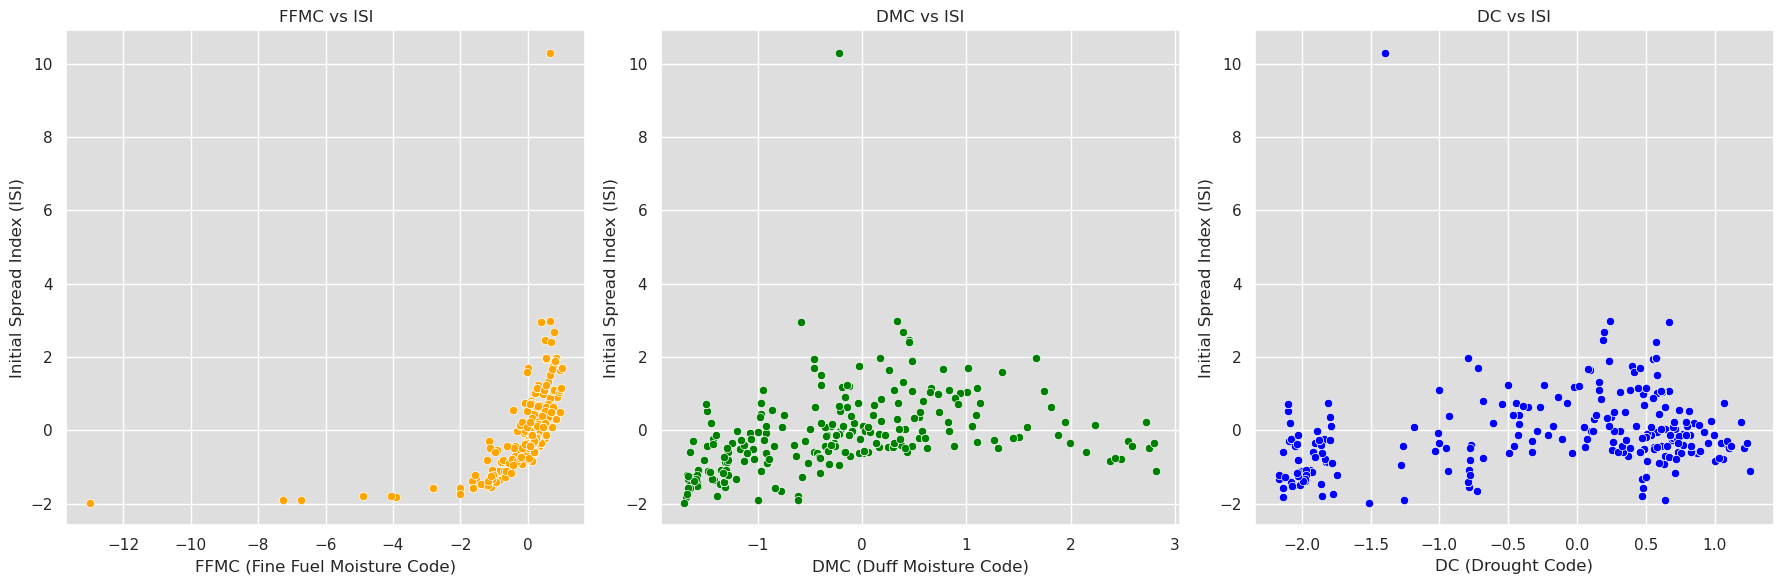

In [120]:
# Set up the figure for multiple subplots
plt.figure(figsize=(18, 6))

# FFMC vs ISI
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_encoded, x='FFMC', y='ISI', color='orange')
plt.title('FFMC vs ISI')
plt.xlabel('FFMC (Fine Fuel Moisture Code)')
plt.ylabel('Initial Spread Index (ISI)')

# DMC vs ISI
plt.subplot(1, 3, 2)
sns.scatterplot(data=df_encoded, x='DMC', y='ISI', color='green')
plt.title('DMC vs ISI')
plt.xlabel('DMC (Duff Moisture Code)')
plt.ylabel('Initial Spread Index (ISI)')

# DC vs ISI
plt.subplot(1, 3, 3)
sns.scatterplot(data=df_encoded, x='DC', y='ISI', color='blue')
plt.title('DC vs ISI')
plt.xlabel('DC (Drought Code)')
plt.ylabel('Initial Spread Index (ISI)')

# Display the plot
plt.tight_layout()
plt.show()


In [121]:
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df_encoded['damage_category'] = df_encoded['log_area'].apply(area_cat)
df_encoded.sample(frac=1).head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,log_area,day,damage_category
440,0.143961,-0.249025,-0.059860,2.799004,1.239348,-0.355129,-0.457053,0.836520,-0.235358,-0.073627,...,1,0,0,0,0,0,0,0.000000,mon,No damage
389,1.011117,-0.249025,0.752859,1.816121,0.641797,0.651490,0.765431,-0.632771,-0.514171,-0.073627,...,0,0,0,0,0,0,0,0.000000,mon,No damage
267,-1.156772,-1.883648,0.265227,0.655383,0.446769,1.154799,0.834303,-1.244975,-0.514171,-0.073627,...,0,0,0,0,0,1,0,0.000000,tue,No damage
477,-0.289616,-1.066336,0.554194,-0.144964,-0.497408,1.242331,1.247537,0.040654,-0.012307,-0.073627,...,0,0,0,1,0,0,0,2.123458,sun,moderate
229,1.444694,1.385599,0.283288,-0.449190,-0.266591,0.629607,-0.422616,-0.081787,-0.012307,-0.073627,...,0,0,1,0,0,0,0,4.280824,sat,moderate


<Figure size 1500x3000 with 0 Axes>

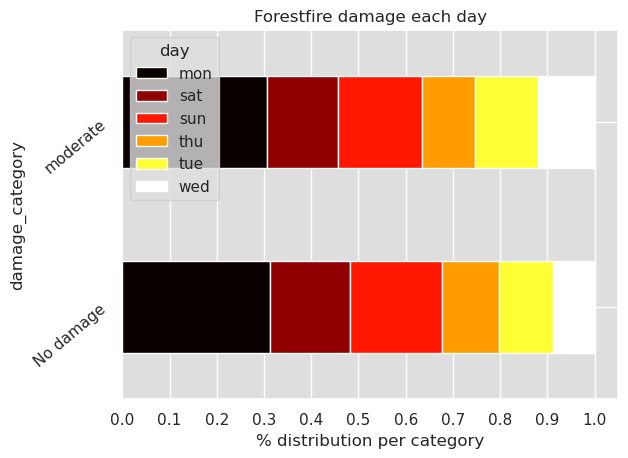

In [122]:
plt.figure(figsize=(15,30))
sns.set(rc={'axes.facecolor':'#DEDEDE', 'figure.facecolor':'white'})
for col in cat_columns:
    cross = pd.crosstab(index=df_encoded['damage_category'],columns=df_encoded[col],normalize='index')
    cross.plot.barh(stacked=True,rot=40,cmap='hot')
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0,1.1,0.1))
    plt.title("Forestfire damage each {}".format(col))
plt.show()

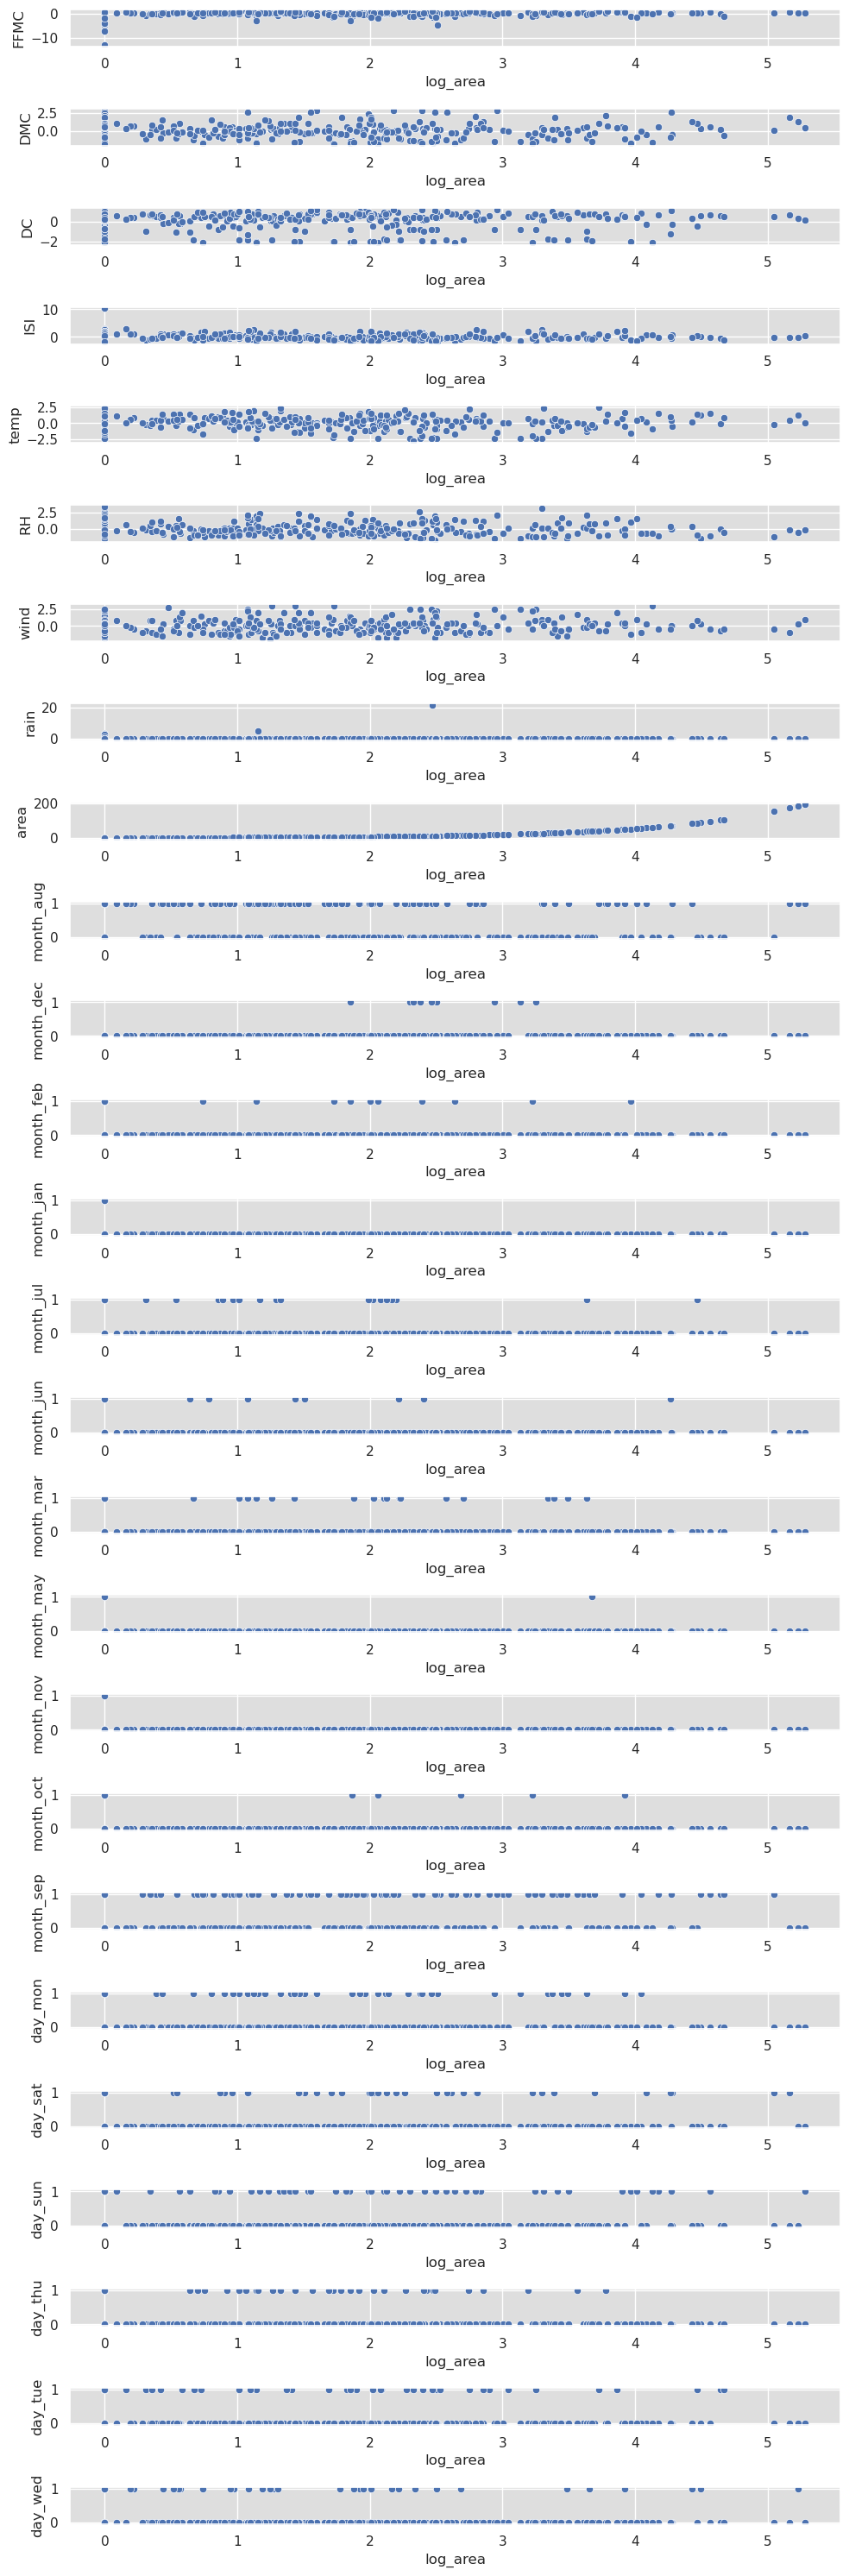

In [125]:
plt.figure(figsize=(10, 30))
acc = 1
for i, col in enumerate(num_columns, 1):
    if col not in ['X', 'Y']:  # Skipping columns 'X' and 'Y'
        plt.subplot(len(num_columns) - 2, 1, acc)  # Dynamically adjust the rows
        sns.scatterplot(data=df_encoded, x='log_area', y=col)
        acc += 1
plt.tight_layout() 
plt.show()


In [126]:
# To drop the one-hot encoded columns related to 'month' and 'day'
selected_features = df_encoded.drop(columns=[col for col in df_encoded.columns if 'month_' in col or 'day_' in col or col in ['damage_category', 'log_area']]).columns
selected_features


Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'day'],
      dtype='object')